# **0. Kaggle 데이터 연결**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bonecar","key":"16e8cf29f7ed598055d79be78b65be57"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset
License(s): CC0-1.0
 98% 214M/219M [00:01<00:00, 167MB/s]
100% 219M/219M [00:01<00:00, 138MB/s]


In [4]:
!unzip -o /content/rice-image-dataset.zip -d /content/data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: /conte

# **1. Introduction**

## 1.1 Rice Variety Classification and Quality Evaluation using Image Anaylsis

Rice, as one of the most prevalent grops globally, exhibits significant genetic diversity, resulting in various rice varieties, These varieties exhibit variations in essential characteristic such as texture, shaoe, and color. By harnessing these differentiating features, it becomes possible to accurately classify and assess the quality of rice seeds.

This research initiative aims to develop a robust image analysis system capable of automatically identifying and categorizing different rice varieties based on their visual attributes. By employing advanced machin learning techniques and deep neural networks, the project endeavors to create a model that can accurately clssify rice sample into the five target varieties.

Additionally, the developed image analysis model can contribute to the broader field of computer vision and pattern recognition. The insight gained from this research can be applied to other grain crops and agricultural products, laading to advancements in automated classification and quality evaluation across various agricultural domains.

In summary, the Rice Variety Classification and Quality Evaluation project utilize a comprehensive dataset of 75,000 rice images to develop a state-of-the-art image analysis system. By accurately classifying and evaluating the quality attributes of five distinct rice varieties, this research aims to enhance rice production processes, support seed selection, and drive advancements in computer vision for agricultural applications. For more information about the dataset use the following Kaggle link: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset

# **2. Import Libraries**

In [5]:
# import requirment libraries and tools
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import warnings
warnings.filterwarnings('ignore')

# **3. Create a dataframe with the Images and Labels**

In [6]:
# Set the path to the dataset
dataset_path = '/content/data/Rice_Image_Dataset'

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):

    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
        # Load the image and store it in the image list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)

        # store the label for the image in the labels liost
        labels.append(subfolder)

# Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

# **4. Visualization of Dataset**

In [7]:
df.head()

,image,label
0,/content/data/Rice_Image_Dataset/Basmati/basma...,Basmati
1,/content/data/Rice_Image_Dataset/Basmati/basma...,Basmati
2,/content/data/Rice_Image_Dataset/Basmati/basma...,Basmati
3,/content/data/Rice_Image_Dataset/Basmati/basma...,Basmati
4,/content/data/Rice_Image_Dataset/Basmati/basma...,Basmati


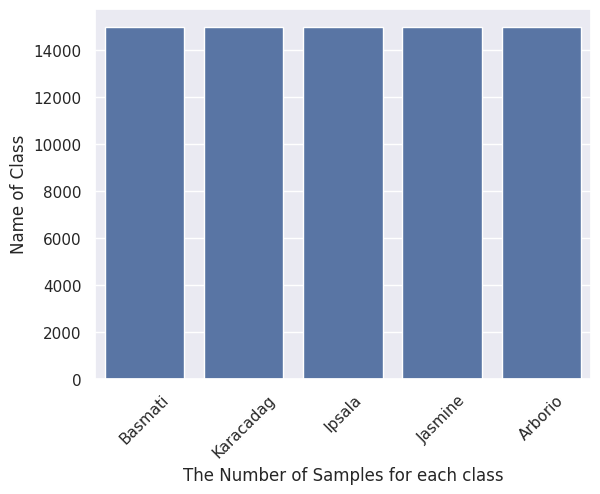

In [8]:
# plot the classes
ax = sns.countplot(x=df.label)

# Set the labels and titles
ax.set_ylabel('Name of Class')
ax.set_xlabel('The Number of Samples for each class')

# Rotate x-axis labels if needed
plt.xticks(rotation = 45)

# Display the plot
plt.show()

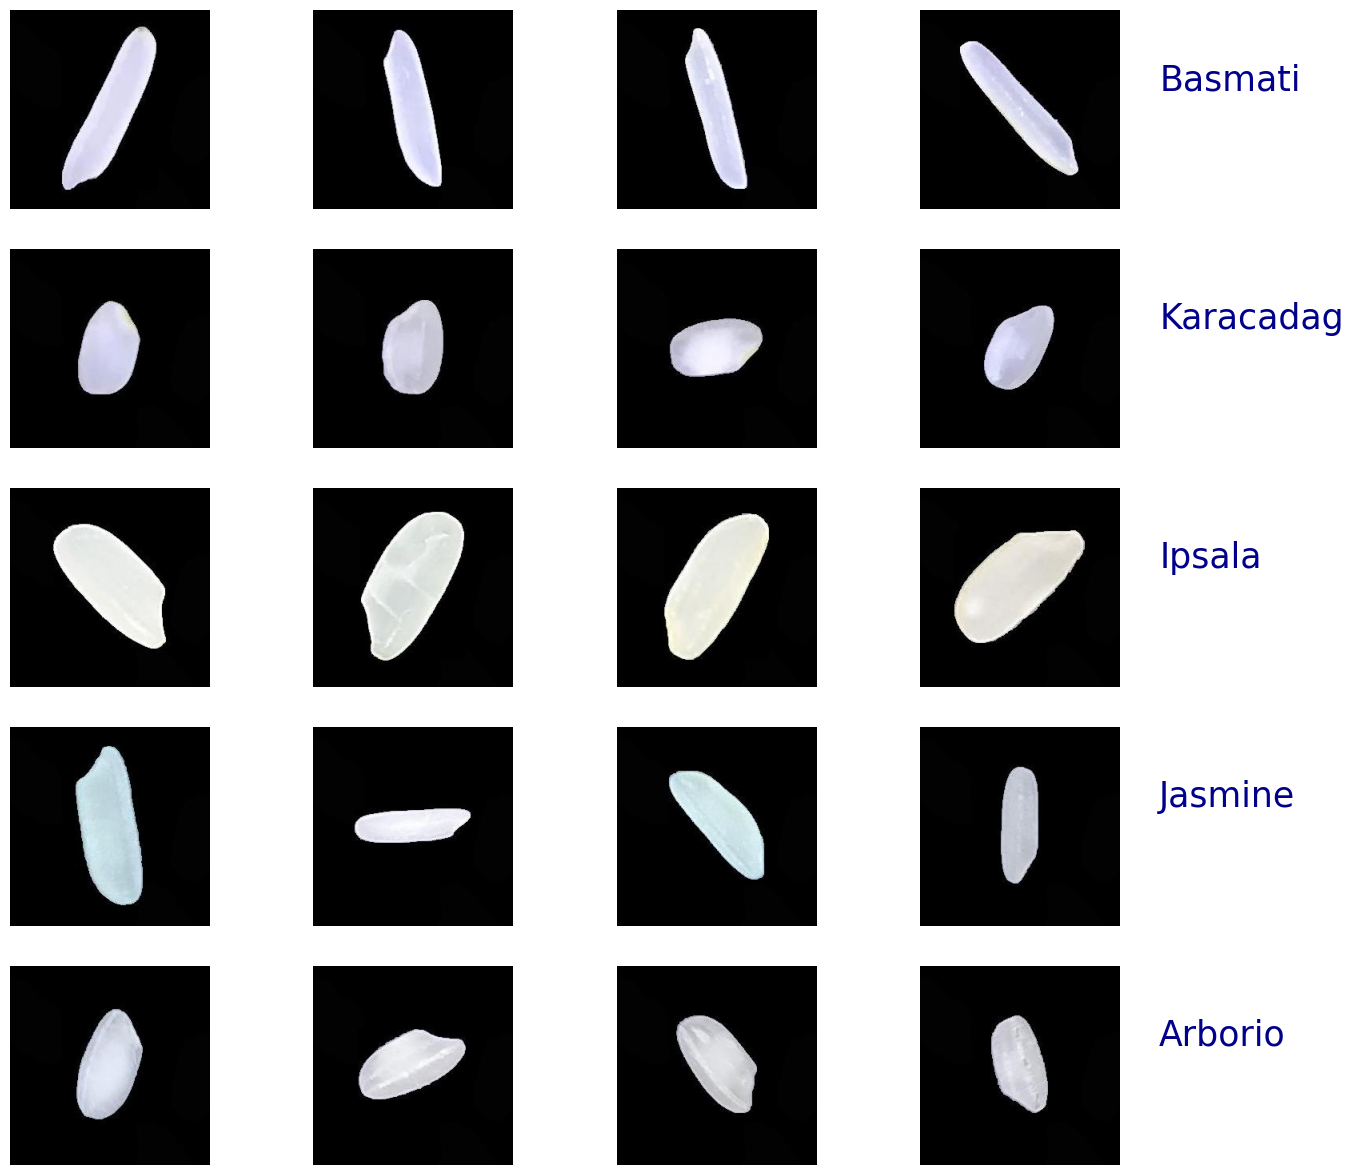

In [9]:
from matplotlib.gridspec import GridSpec
# Create figure and grid of subplots
fig = plt.figure(figsize=(15,15))
gs = GridSpec(5,4,figure=fig)

# Loop through each unique category in the DataFrame
for i, category in enumerate(df['label'].unique()):
    # Get thge filepaths for the first four images in the category
    filepaths = df[df['label']==category]['image'].values[:4]

    # Loop through the filepaths and add an iamge to each subplot
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i,j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')

    # Add a label to the bottom of the subplot grid
    ax.text(300,100, category, fontsize = 25, color = 'darkblue')

plt.show()

# **5. Split Data into Train and Test**

I divied our data into two separate datasets: the training dataset and the testing dataset. The training dataset consists of 80% of the data, while the testing dataset contains the remaining 20%. To facilitate the training process, I applied the LabelEncoer to labels. This process allowed us to convert the rice types' labels, namely 'Arborio', 'Basmati', 'Ipsala', 'Jasmine', and 'Karacadag', into numerical values. By assigning integer valus to the labels, we enabled the utilization of these labels as target variables during the training of our machine learning model.

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size = 0.2, random_state = 42)

# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# **6. Data Augmentation**

To streamline the preprocessing of our images, we took the following steps:
* we created generators for both the training. and testing datasets. These generators allow us to efficiently handle and manipulate the data during the training and testing phases.
* to enhance the diversity and robustness of our training data, we applied data augmentation techniques specifically to the training dataset. This augmentation process introduces variations in the images by applying transformations such as rotaion, scaling, and flipping. By doing so, we expand the dataset and enable our model to learn from a wider range of image variations.
* Additionally, we standardized the image dimensions by reshaping them to a uniform size of 50x50 pixels. This resizing ensures that all images in the dataset have consistent dimensions, facilitating the subsequent processing and analysis stages.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set the image size and batch size
image_size = (50,50)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 45,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
)

# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create a generator formthe test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 60000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.


# **7. Training Model**

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Set the input shape for the model
input_shape=(50,50,3)

# Create a Sequential model
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(5, activation='softmax'))

In [13]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [14]:
# Train the model on the training data
history = model.fit(train_generator, epochs = 5, validation_data = test_generator)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 146s 75ms/step - accuracy: 0.7549 - loss: 0.5933 - val_accuracy: 0.8259 - val_loss: 0.4506
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 176s 63ms/step - accuracy: 0.9329 - loss: 0.1805 - val_accuracy: 0.9529 - val_loss: 0.1267
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 117s 62ms/step - accuracy: 0.9535 - loss: 0.1279 - val_accuracy: 0.9681 - val_loss: 0.0883
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 146s 65ms/step - accuracy: 0.9645 - loss: 0.0991 - val_accuracy: 0.9590 - val_loss: 0.1189
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 120s 64ms/step - accuracy: 0.9696 - loss: 0.0838 - val_accuracy: 0.9815 - val_loss: 0.0520


# **8. Evaluate The Model**

In [15]:
# Evaluate the model on the test data
metrics = model.evaluate(test_generator)
# Print the accuracy of the model
print('Accuracy:', metrics[1])

469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.9793 - loss: 0.0574
Accuracy: 0.9805333614349365
